In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir("../data/")

['embeddings_medellin_200features.csv',
 'pca_medellin_100features.csv',
 'Dengue Dataset.pdf',
 'Dengue_Dataset(Medellin).csv',
 'features_transformer.csv',
 'pca_medellin_120features(10_per_band).csv',
 'features_resnet50.csv',
 'Dataset Dengue (Espanol).pdf',
 'embeddings_medellin_100features.csv',
 'dengue_data_all_municipalities.csv']

In [3]:
data_path = os.path.join('..', 'data', 'dengue_data_all_municipalities.csv')
data_path

'../data/dengue_data_all_municipalities.csv'

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.head()

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,29,17,35,16,21,15,20,30,14,5
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,0,0,0,0,0,1,1,1,0,0


## Generation of variables that go for municipalities (independant of time)

In [6]:
municipio_vars = [
'AfrocolombianPopulation(%)',
'IndianPopulation(%)',
'PeoplewithDisabilities(%)',
'Peoplewhocannotreadorwrite(%)',
'Secondary/HigherEducation(%)',
'Employedpopulation(%)',
'Unemployedpopulation(%)',
'Peopledoinghousework(%)',
'Retiredpeople(%)',
'Men(%)',
'Women(%)',
'Householdswithoutwateraccess(%)',
'Householdswithoutinternetaccess(%)',
'Buildingstratification1(%)',
'Buildingstratification2(%)',
'Buildingstratification3(%)',
'Buildingstratification4(%)',
'Buildingstratification5(%)',
'Buildingstratification6(%)',
'NumberofhospitalsperKm2',
'NumberofhousesperKm2',
]

In [7]:
data[['Municipality code', 'Municipality']+municipio_vars]

,Municipality code,Municipality,AfrocolombianPopulation(%),IndianPopulation(%),PeoplewithDisabilities(%),Peoplewhocannotreadorwrite(%),Secondary/HigherEducation(%),Employedpopulation(%),Unemployedpopulation(%),Peopledoinghousework(%),...,Householdswithoutwateraccess(%),Householdswithoutinternetaccess(%),Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2
0,5001,Medellín,2.51,0.09,6.27,3.17,67.43,43.23,5.64,13.91,...,1.44,29.47,12.1117,31.2817,26.0471,9.0279,6.4855,3.7062,1.555263,2102.057895
1,5002,Abejorral,0.35,0.01,16.05,9.89,33.65,39.60,0.89,26.37,...,21.87,56.27,31.3520,33.8306,2.0439,0.0352,0.0117,0.0000,0.002012,11.945674
2,5004,Abriaquí,1.99,0.00,16.72,6.72,45.72,36.78,1.85,24.50,...,24.03,62.35,21.5705,39.1675,4.3519,0.0946,0.1892,0.1892,0.000000,2.548276
3,5021,Alejandría,0.31,0.00,8.10,8.75,38.79,37.07,1.25,25.89,...,17.06,54.61,17.9879,38.5721,4.8215,0.1854,0.0464,0.0464,0.006623,9.092715
4,5030,Amagá,0.48,0.03,9.02,7.68,51.67,39.21,3.36,21.48,...,3.31,56.12,27.8784,42.0280,3.4086,0.1889,0.1460,0.0172,0.011765,102.752941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0.26,88.62,4.63,4.23,32.94,3.31,0.93,18.39,...,92.93,75.76,6.0606,1.0101,0.0000,0.0000,0.0000,0.0000,0.000000,0.028621
1117,99001,Puerto Carreño,1.38,28.26,3.74,11.25,46.90,28.16,6.26,18.64,...,32.52,68.68,41.0368,15.3779,2.4037,0.0579,0.0145,0.0145,0.000388,0.432426
1118,99524,La Primavera,1.09,21.73,4.55,8.69,39.41,24.05,5.71,24.67,...,26.46,72.64,39.3295,5.0284,0.7782,0.0299,0.0000,0.0000,0.000000,0.113272
1119,99624,Santa Rosalía,1.12,26.58,4.15,8.15,42.40,23.97,2.06,24.59,...,27.58,81.35,50.2627,7.0053,0.2627,0.0000,0.0000,0.0000,0.000254,0.247904


## Generation of variables that depend on municipality and year

### population table

In [8]:
population_vars = [
'Population2007',
'Population2008',
'Population2009',
'Population2010',
'Population2011',
'Population2012',
'Population2013',
'Population2014',
'Population2015',
'Population2016',
'Population2017',
'Population2018',
'Population2019',
]


In [9]:
population_data = data[['Municipality code', 'Municipality']+population_vars]
population_data

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,Population2016,Population2017,Population2018,Population2019
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,2431666,2420516,2414616,2427129,2483545
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,19897,19979,20047,20367,20258
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,2514,2539,2593,2695,2710
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,4511,4543,4570,4657,4669
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,28691,29006,29429,30227,30777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,555,693,841,1003,1164,1275,1349,1334,1212,1073,1027,1048,1067
1117,99001,Puerto Carreño,13742,14559,15346,16124,16934,17773,18635,19519,20319,20921,21087,20936,20474
1118,99524,La Primavera,5190,5784,6365,6920,7496,8034,8617,9166,9694,10098,10233,10122,9799
1119,99624,Santa Rosalía,3167,3378,3586,3846,4067,4325,4535,4635,4551,4296,4083,4059,4130


In [10]:
population_data = population_data.melt(id_vars=["Municipality code", "Municipality"], 
        var_name="Date", 
        value_name="population")
population_data

,Municipality code,Municipality,Date,population
0,5001,Medellín,Population2007,2286126
1,5002,Abejorral,Population2007,20643
2,5004,Abriaquí,Population2007,2261
3,5021,Alejandría,Population2007,3935
4,5030,Amagá,Population2007,27996
...,...,...,...,...
14568,97889,Yavaraté,Population2019,1067
14569,99001,Puerto Carreño,Population2019,20474
14570,99524,La Primavera,Population2019,9799
14571,99624,Santa Rosalía,Population2019,4130


In [11]:
population_data["year"] = population_data["Date"].apply(lambda x: int(x[-4:]))

In [12]:
population_data

,Municipality code,Municipality,Date,population,year
0,5001,Medellín,Population2007,2286126,2007
1,5002,Abejorral,Population2007,20643,2007
2,5004,Abriaquí,Population2007,2261,2007
3,5021,Alejandría,Population2007,3935,2007
4,5030,Amagá,Population2007,27996,2007
...,...,...,...,...,...
14568,97889,Yavaraté,Population2019,1067,2019
14569,99001,Puerto Carreño,Population2019,20474,2019
14570,99524,La Primavera,Population2019,9799,2019
14571,99624,Santa Rosalía,Population2019,4130,2019


### cases per year - table

In [13]:
cases_vars = [
  'Cases2007',
'Cases2008',
'Cases2009',
'Cases2010',
'Cases2011',
'Cases2012',
'Cases2013',
'Cases2014',
'Cases2015',
'Cases2016',
'Cases2017',
'Cases2018',
'Cases2019',  
]

In [14]:
year_cases_data = data[['Municipality code', 'Municipality']+cases_vars]
year_cases_data

,Municipality code,Municipality,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,5001,Medellín,5,902,413,15570,802,713,2342,3161,3785,17306,2100,1172,1276
1,5002,Abejorral,0,1,0,79,1,0,0,0,2,5,1,2,0
2,5004,Abriaquí,0,0,0,3,0,0,0,0,0,2,0,1,2
3,5021,Alejandría,0,0,0,5,0,0,1,0,0,5,0,0,0
4,5030,Amagá,0,2,1,297,13,3,3,3,120,196,17,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0,0,0,0,1,0,0,1,0,0,0,0,0
1117,99001,Puerto Carreño,53,114,39,199,198,53,118,40,27,32,5,5,214
1118,99524,La Primavera,32,20,8,41,3,8,48,22,25,72,0,3,92
1119,99624,Santa Rosalía,12,3,1,51,16,20,54,35,15,14,9,0,31


In [15]:
year_cases_data = year_cases_data.melt(id_vars=["Municipality code", "Municipality"], 
        var_name="Date", 
        value_name="year_cases")
year_cases_data

,Municipality code,Municipality,Date,year_cases
0,5001,Medellín,Cases2007,5
1,5002,Abejorral,Cases2007,0
2,5004,Abriaquí,Cases2007,0
3,5021,Alejandría,Cases2007,0
4,5030,Amagá,Cases2007,0
...,...,...,...,...
14568,97889,Yavaraté,Cases2019,0
14569,99001,Puerto Carreño,Cases2019,214
14570,99524,La Primavera,Cases2019,92
14571,99624,Santa Rosalía,Cases2019,31


In [16]:
year_cases_data["year"] = year_cases_data["Date"].apply(lambda x: int(x[-4:]))

In [17]:
year_cases_data

,Municipality code,Municipality,Date,year_cases,year
0,5001,Medellín,Cases2007,5,2007
1,5002,Abejorral,Cases2007,0,2007
2,5004,Abriaquí,Cases2007,0,2007
3,5021,Alejandría,Cases2007,0,2007
4,5030,Amagá,Cases2007,0,2007
...,...,...,...,...,...
14568,97889,Yavaraté,Cases2019,0,2019
14569,99001,Puerto Carreño,Cases2019,214,2019
14570,99524,La Primavera,Cases2019,92,2019
14571,99624,Santa Rosalía,Cases2019,31,2019


## Generation of variables that depend on municipality, year and month

In [18]:
month_dict = {
    'jan':1, 
    'feb':2, 
    'mar':3, 
    'apr':4, 
    'may':5, 
    'jun':6, 
    'jul':7, 
    'aug':8, 
    'sep':9,
    'oct':10, 
    'nov':11, 
    'dec':12
}

### Generate temperature table

In [19]:
temperature_vars = [
'TEMPERATURE_jan_07',
'TEMPERATURE_feb_07',
'TEMPERATURE_mar_07',
'TEMPERATURE_apr_07',
'TEMPERATURE_may_07',
'TEMPERATURE_jun_07',
'TEMPERATURE_jul_07',
'TEMPERATURE_aug_07',
'TEMPERATURE_sep_07',
'TEMPERATURE_oct_07',
'TEMPERATURE_nov_07',
'TEMPERATURE_dec_07',
'TEMPERATURE_jan_08',
'TEMPERATURE_feb_08',
'TEMPERATURE_mar_08',
'TEMPERATURE_apr_08',
'TEMPERATURE_may_08',
'TEMPERATURE_jun_08',
'TEMPERATURE_jul_08',
'TEMPERATURE_aug_08',
'TEMPERATURE_sep_08',
'TEMPERATURE_oct_08',
'TEMPERATURE_nov_08',
'TEMPERATURE_dec_08',
'TEMPERATURE_jan_09',
'TEMPERATURE_feb_09',
'TEMPERATURE_mar_09',
'TEMPERATURE_apr_09',
'TEMPERATURE_may_09',
'TEMPERATURE_jun_09',
'TEMPERATURE_jul_09',
'TEMPERATURE_aug_09',
'TEMPERATURE_sep_09',
'TEMPERATURE_oct_09',
'TEMPERATURE_nov_09',
'TEMPERATURE_dec_09',
'TEMPERATURE_jan_10',
'TEMPERATURE_feb_10',
'TEMPERATURE_mar_10',
'TEMPERATURE_apr_10',
'TEMPERATURE_may_10',
'TEMPERATURE_jun_10',
'TEMPERATURE_jul_10',
'TEMPERATURE_aug_10',
'TEMPERATURE_sep_10',
'TEMPERATURE_oct_10',
'TEMPERATURE_nov_10',
'TEMPERATURE_dec_10',
'TEMPERATURE_jan_11',
'TEMPERATURE_feb_11',
'TEMPERATURE_mar_11',
'TEMPERATURE_apr_11',
'TEMPERATURE_may_11',
'TEMPERATURE_jun_11',
'TEMPERATURE_jul_11',
'TEMPERATURE_aug_11',
'TEMPERATURE_sep_11',
'TEMPERATURE_oct_11',
'TEMPERATURE_nov_11',
'TEMPERATURE_dec_11',
'TEMPERATURE_jan_12',
'TEMPERATURE_feb_12',
'TEMPERATURE_mar_12',
'TEMPERATURE_apr_12',
'TEMPERATURE_may_12',
'TEMPERATURE_jun_12',
'TEMPERATURE_jul_12',
'TEMPERATURE_aug_12',
'TEMPERATURE_sep_12',
'TEMPERATURE_oct_12',
'TEMPERATURE_nov_12',
'TEMPERATURE_dec_12',
'TEMPERATURE_jan_13',
'TEMPERATURE_feb_13',
'TEMPERATURE_mar_13',
'TEMPERATURE_apr_13',
'TEMPERATURE_may_13',
'TEMPERATURE_jun_13',
'TEMPERATURE_jul_13',
'TEMPERATURE_aug_13',
'TEMPERATURE_sep_13',
'TEMPERATURE_oct_13',
'TEMPERATURE_nov_13',
'TEMPERATURE_dec_13',
'TEMPERATURE_jan_14',
'TEMPERATURE_feb_14',
'TEMPERATURE_mar_14',
'TEMPERATURE_apr_14',
'TEMPERATURE_may_14',
'TEMPERATURE_jun_14',
'TEMPERATURE_jul_14',
'TEMPERATURE_aug_14',
'TEMPERATURE_sep_14',
'TEMPERATURE_oct_14',
'TEMPERATURE_nov_14',
'TEMPERATURE_dec_14',
'TEMPERATURE_jan_15',
'TEMPERATURE_feb_15',
'TEMPERATURE_mar_15',
'TEMPERATURE_apr_15',
'TEMPERATURE_may_15',
'TEMPERATURE_jun_15',
'TEMPERATURE_jul_15',
'TEMPERATURE_aug_15',
'TEMPERATURE_sep_15',
'TEMPERATURE_oct_15',
'TEMPERATURE_nov_15',
'TEMPERATURE_dec_15',
'TEMPERATURE_jan_16',
'TEMPERATURE_feb_16',
'TEMPERATURE_mar_16',
'TEMPERATURE_apr_16',
'TEMPERATURE_may_16',
'TEMPERATURE_jun_16',
'TEMPERATURE_jul_16',
'TEMPERATURE_aug_16',
'TEMPERATURE_sep_16',
'TEMPERATURE_oct_16',
'TEMPERATURE_nov_16',
'TEMPERATURE_dec_16',
'TEMPERATURE_jan_17',
'TEMPERATURE_feb_17',
'TEMPERATURE_mar_17',
'TEMPERATURE_apr_17',
'TEMPERATURE_may_17',
'TEMPERATURE_jun_17',
'TEMPERATURE_jul_17',
'TEMPERATURE_aug_17',
'TEMPERATURE_sep_17',
'TEMPERATURE_oct_17',
'TEMPERATURE_nov_17',
'TEMPERATURE_dec_17',
'TEMPERATURE_jan_18',
'TEMPERATURE_feb_18',
'TEMPERATURE_mar_18',
'TEMPERATURE_apr_18',
'TEMPERATURE_may_18',
'TEMPERATURE_jun_18',
'TEMPERATURE_jul_18',
'TEMPERATURE_aug_18',
'TEMPERATURE_sep_18',
'TEMPERATURE_oct_18',
'TEMPERATURE_nov_18',
'TEMPERATURE_dec_18',
]


In [20]:
temperature_data = data[['Municipality code', 'Municipality']+temperature_vars]
temperature_data 

,Municipality code,Municipality,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,...,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18
0,5001,Medellín,21.009283,20.982925,21.425911,21.237032,21.322522,21.243176,21.686978,20.866394,...,21.726171,21.124271,21.037365,21.457151,21.952168,21.719432,21.347202,20.748416,20.886703,20.936353
1,5002,Abejorral,16.566818,16.545661,16.853578,16.592266,16.764218,16.744885,16.738302,16.154948,...,17.169984,16.471953,16.495468,17.036293,17.063302,17.103385,17.011875,16.495094,16.674297,16.627245
2,5004,Abriaquí,16.988332,16.940564,17.444237,17.463490,17.461414,17.357063,17.557740,16.717581,...,17.833994,17.378247,17.221657,17.529025,17.843157,17.512112,17.356325,16.911367,17.231535,17.080420
3,5021,Alejandría,20.606707,20.672624,21.210392,21.113854,21.331241,21.114738,21.333450,20.634999,...,21.489558,20.985991,21.025772,21.377411,21.652374,21.425886,21.230342,20.725872,20.687894,20.574121
4,5030,Amagá,20.814870,20.851651,21.328261,21.144019,21.174519,20.900712,21.281823,20.447760,...,21.648314,21.020582,20.880769,21.149931,21.560988,21.380573,21.026458,20.558420,20.625113,20.717262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,26.708149,27.050801,26.316475,26.150623,25.452312,25.064161,24.929709,25.017467,...,26.505539,25.702706,25.167677,25.276139,25.008356,25.352882,26.116107,26.381042,26.529586,26.300149
1117,99001,Puerto Carreño,29.710881,30.431314,30.537816,29.317689,28.358616,27.334923,27.086235,27.009569,...,29.914727,28.625936,27.245942,26.710096,26.794482,27.001324,27.557754,27.757870,28.391361,28.290137
1118,99524,La Primavera,29.076091,29.464032,29.480690,28.325781,27.578315,26.635199,26.743574,26.512006,...,29.391974,27.948265,26.860780,26.380163,26.470571,26.864957,27.489720,27.587379,28.106454,28.010822
1119,99624,Santa Rosalía,28.356804,28.866877,28.733139,27.563194,26.854834,25.773636,25.887431,25.768856,...,28.906054,27.354861,26.131048,25.852802,25.822849,26.348023,27.013428,27.146027,27.544563,27.512444


In [21]:
temperature_data = temperature_data.melt(id_vars=["Municipality code", "Municipality"], 
        var_name="Date", 
        value_name="temperature")
temperature_data

,Municipality code,Municipality,Date,temperature
0,5001,Medellín,TEMPERATURE_jan_07,21.009283
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707
4,5030,Amagá,TEMPERATURE_jan_07,20.814870
...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444


#### month and year

In [22]:
temperature_data["month_str"] = temperature_data["Date"].apply(lambda x: x.split("_")[1])
temperature_data

,Municipality code,Municipality,Date,temperature,month_str
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan
...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec


In [23]:
# Transform the month string into the number corresponding to the month
temperature_data["month"] = temperature_data.month_str.map(month_dict)
temperature_data

,Municipality code,Municipality,Date,temperature,month_str,month
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1
...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12


In [24]:
temperature_data["year"] = temperature_data["Date"].apply(lambda x: int(x.split("_")[2])+2000)
temperature_data

,Municipality code,Municipality,Date,temperature,month_str,month,year
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007
...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018


### Generate precipitation table

In [25]:
precipitation_vars = [
'PRECIPITATION_jan_07',
'PRECIPITATION_feb_07',
'PRECIPITATION_mar_07',
'PRECIPITATION_apr_07',
'PRECIPITATION_may_07',
'PRECIPITATION_jun_07',
'PRECIPITATION_jul_07',
'PRECIPITATION_aug_07',
'PRECIPITATION_sep_07',
'PRECIPITATION_oct_07',
'PRECIPITATION_nov_07',
'PRECIPITATION_dec_07',
'PRECIPITATION_jan_08',
'PRECIPITATION_feb_08',
'PRECIPITATION_mar_08',
'PRECIPITATION_apr_08',
'PRECIPITATION_may_08',
'PRECIPITATION_jun_08',
'PRECIPITATION_jul_08',
'PRECIPITATION_aug_08',
'PRECIPITATION_sep_08',
'PRECIPITATION_oct_08',
'PRECIPITATION_nov_08',
'PRECIPITATION_dec_08',
'PRECIPITATION_jan_09',
'PRECIPITATION_feb_09',
'PRECIPITATION_mar_09',
'PRECIPITATION_apr_09',
'PRECIPITATION_may_09',
'PRECIPITATION_jun_09',
'PRECIPITATION_jul_09',
'PRECIPITATION_aug_09',
'PRECIPITATION_sep_09',
'PRECIPITATION_oct_09',
'PRECIPITATION_nov_09',
'PRECIPITATION_dec_09',
'PRECIPITATION_jan_10',
'PRECIPITATION_feb_10',
'PRECIPITATION_mar_10',
'PRECIPITATION_apr_10',
'PRECIPITATION_may_10',
'PRECIPITATION_jun_10',
'PRECIPITATION_jul_10',
'PRECIPITATION_aug_10',
'PRECIPITATION_sep_10',
'PRECIPITATION_oct_10',
'PRECIPITATION_nov_10',
'PRECIPITATION_dec_10',
'PRECIPITATION_jan_11',
'PRECIPITATION_feb_11',
'PRECIPITATION_mar_11',
'PRECIPITATION_apr_11',
'PRECIPITATION_may_11',
'PRECIPITATION_jun_11',
'PRECIPITATION_jul_11',
'PRECIPITATION_aug_11',
'PRECIPITATION_sep_11',
'PRECIPITATION_oct_11',
'PRECIPITATION_nov_11',
'PRECIPITATION_dec_11',
'PRECIPITATION_jan_12',
'PRECIPITATION_feb_12',
'PRECIPITATION_mar_12',
'PRECIPITATION_apr_12',
'PRECIPITATION_may_12',
'PRECIPITATION_jun_12',
'PRECIPITATION_jul_12',
'PRECIPITATION_aug_12',
'PRECIPITATION_sep_12',
'PRECIPITATION_oct_12',
'PRECIPITATION_nov_12',
'PRECIPITATION_dec_12',
'PRECIPITATION_jan_13',
'PRECIPITATION_feb_13',
'PRECIPITATION_mar_13',
'PRECIPITATION_apr_13',
'PRECIPITATION_may_13',
'PRECIPITATION_jun_13',
'PRECIPITATION_jul_13',
'PRECIPITATION_aug_13',
'PRECIPITATION_sep_13',
'PRECIPITATION_oct_13',
'PRECIPITATION_nov_13',
'PRECIPITATION_dec_13',
'PRECIPITATION_jan_14',
'PRECIPITATION_feb_14',
'PRECIPITATION_mar_14',
'PRECIPITATION_apr_14',
'PRECIPITATION_may_14',
'PRECIPITATION_jun_14',
'PRECIPITATION_jul_14',
'PRECIPITATION_aug_14',
'PRECIPITATION_sep_14',
'PRECIPITATION_oct_14',
'PRECIPITATION_nov_14',
'PRECIPITATION_dec_14',
'PRECIPITATION_jan_15',
'PRECIPITATION_feb_15',
'PRECIPITATION_mar_15',
'PRECIPITATION_apr_15',
'PRECIPITATION_may_15',
'PRECIPITATION_jun_15',
'PRECIPITATION_jul_15',
'PRECIPITATION_aug_15',
'PRECIPITATION_sep_15',
'PRECIPITATION_oct_15',
'PRECIPITATION_nov_15',
'PRECIPITATION_dec_15',
'PRECIPITATION_jan_16',
'PRECIPITATION_feb_16',
'PRECIPITATION_mar_16',
'PRECIPITATION_apr_16',
'PRECIPITATION_may_16',
'PRECIPITATION_jun_16',
'PRECIPITATION_jul_16',
'PRECIPITATION_aug_16',
'PRECIPITATION_sep_16',
'PRECIPITATION_oct_16',
'PRECIPITATION_nov_16',
'PRECIPITATION_dec_16',
'PRECIPITATION_jan_17',
'PRECIPITATION_feb_17',
'PRECIPITATION_mar_17',
'PRECIPITATION_apr_17',
'PRECIPITATION_may_17',
'PRECIPITATION_jun_17',
'PRECIPITATION_jul_17',
'PRECIPITATION_aug_17',
'PRECIPITATION_sep_17',
'PRECIPITATION_oct_17',
'PRECIPITATION_nov_17',
'PRECIPITATION_dec_17',
'PRECIPITATION_jan_18',
'PRECIPITATION_feb_18',
'PRECIPITATION_mar_18',
'PRECIPITATION_apr_18',
'PRECIPITATION_may_18',
'PRECIPITATION_jun_18',
'PRECIPITATION_jul_18',
'PRECIPITATION_aug_18',
'PRECIPITATION_sep_18',
'PRECIPITATION_oct_18',
'PRECIPITATION_nov_18',
'PRECIPITATION_dec_18',
]

In [26]:
precipitation_data = data[['Municipality code', 'Municipality']+precipitation_vars]
precipitation_data 

,Municipality code,Municipality,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,...,PRECIPITATION_mar_18,PRECIPITATION_apr_18,PRECIPITATION_may_18,PRECIPITATION_jun_18,PRECIPITATION_jul_18,PRECIPITATION_aug_18,PRECIPITATION_sep_18,PRECIPITATION_oct_18,PRECIPITATION_nov_18,PRECIPITATION_dec_18
0,5001,Medellín,65.411400,49.307404,195.452469,291.927124,345.532501,157.963028,386.515533,230.007416,...,140.323318,267.799438,418.379303,219.436752,180.841248,200.803131,294.888611,302.151306,276.914551,67.528000
1,5002,Abejorral,73.411079,55.334660,211.111679,298.137146,368.622955,145.024872,337.009155,245.224106,...,145.937302,266.998016,456.432129,191.030685,171.043686,202.056366,263.658752,274.999481,276.055359,60.356739
2,5004,Abriaquí,53.842678,37.477692,152.713318,246.919952,334.840881,152.230927,422.573364,221.506516,...,111.904190,214.366913,374.212677,225.602829,160.006393,216.341446,273.485809,267.168549,257.440796,63.571411
3,5021,Alejandría,66.638855,66.628891,199.928375,286.881470,345.874695,161.073792,339.436737,324.082489,...,147.506775,292.958588,436.878143,225.225449,195.619019,256.421906,302.413086,353.701385,277.470184,61.464046
4,5030,Amagá,62.527489,46.315376,166.522003,288.957397,350.666260,143.757507,350.168793,210.302658,...,117.747261,256.695129,421.436859,195.391815,162.015167,182.192062,274.654327,259.078125,282.538574,68.923813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,217.661713,134.565353,239.813202,452.434814,381.056885,342.738068,342.514343,278.347107,...,252.428787,461.180878,383.912537,313.857819,439.042084,259.967499,228.402420,219.714844,321.411407,278.270264
1117,99001,Puerto Carreño,9.086086,1.024919,74.337234,118.855217,300.548218,548.346130,382.576141,421.836273,...,50.140205,165.264664,298.555725,406.934784,415.627289,356.083832,289.744232,203.861130,113.063705,46.351234
1118,99524,La Primavera,12.413048,9.197676,72.397057,171.536575,352.242706,490.604065,319.890625,411.128052,...,65.763680,216.379608,317.782349,450.757782,368.413727,398.009094,273.555542,227.666840,138.658142,56.324593
1119,99624,Santa Rosalía,15.669939,26.594461,86.531944,233.093735,352.469208,495.871796,317.735199,373.553619,...,76.090843,253.826614,346.066498,513.568542,355.766449,350.775452,260.249359,276.039124,126.202217,55.008774


In [27]:
precipitation_data = precipitation_data.melt(id_vars=["Municipality code", "Municipality"], 
        var_name="Date", 
        value_name="precipitation")
precipitation_data

,Municipality code,Municipality,Date,precipitation
0,5001,Medellín,PRECIPITATION_jan_07,65.411400
1,5002,Abejorral,PRECIPITATION_jan_07,73.411079
2,5004,Abriaquí,PRECIPITATION_jan_07,53.842678
3,5021,Alejandría,PRECIPITATION_jan_07,66.638855
4,5030,Amagá,PRECIPITATION_jan_07,62.527489
...,...,...,...,...
161419,97889,Yavaraté,PRECIPITATION_dec_18,278.270264
161420,99001,Puerto Carreño,PRECIPITATION_dec_18,46.351234
161421,99524,La Primavera,PRECIPITATION_dec_18,56.324593
161422,99624,Santa Rosalía,PRECIPITATION_dec_18,55.008774


#### month and year

In [28]:
precipitation_data["month_str"] = precipitation_data["Date"].apply(lambda x: x.split("_")[1])
precipitation_data

,Municipality code,Municipality,Date,precipitation,month_str
0,5001,Medellín,PRECIPITATION_jan_07,65.411400,jan
1,5002,Abejorral,PRECIPITATION_jan_07,73.411079,jan
2,5004,Abriaquí,PRECIPITATION_jan_07,53.842678,jan
3,5021,Alejandría,PRECIPITATION_jan_07,66.638855,jan
4,5030,Amagá,PRECIPITATION_jan_07,62.527489,jan
...,...,...,...,...,...
161419,97889,Yavaraté,PRECIPITATION_dec_18,278.270264,dec
161420,99001,Puerto Carreño,PRECIPITATION_dec_18,46.351234,dec
161421,99524,La Primavera,PRECIPITATION_dec_18,56.324593,dec
161422,99624,Santa Rosalía,PRECIPITATION_dec_18,55.008774,dec


In [29]:
# Transform the month string into the number corresponding to the month
precipitation_data["month"] = precipitation_data.month_str.map(month_dict)
precipitation_data

,Municipality code,Municipality,Date,precipitation,month_str,month
0,5001,Medellín,PRECIPITATION_jan_07,65.411400,jan,1
1,5002,Abejorral,PRECIPITATION_jan_07,73.411079,jan,1
2,5004,Abriaquí,PRECIPITATION_jan_07,53.842678,jan,1
3,5021,Alejandría,PRECIPITATION_jan_07,66.638855,jan,1
4,5030,Amagá,PRECIPITATION_jan_07,62.527489,jan,1
...,...,...,...,...,...,...
161419,97889,Yavaraté,PRECIPITATION_dec_18,278.270264,dec,12
161420,99001,Puerto Carreño,PRECIPITATION_dec_18,46.351234,dec,12
161421,99524,La Primavera,PRECIPITATION_dec_18,56.324593,dec,12
161422,99624,Santa Rosalía,PRECIPITATION_dec_18,55.008774,dec,12


In [30]:
precipitation_data["year"] = precipitation_data["Date"].apply(lambda x: int(x.split("_")[2])+2000)
precipitation_data

,Municipality code,Municipality,Date,precipitation,month_str,month,year
0,5001,Medellín,PRECIPITATION_jan_07,65.411400,jan,1,2007
1,5002,Abejorral,PRECIPITATION_jan_07,73.411079,jan,1,2007
2,5004,Abriaquí,PRECIPITATION_jan_07,53.842678,jan,1,2007
3,5021,Alejandría,PRECIPITATION_jan_07,66.638855,jan,1,2007
4,5030,Amagá,PRECIPITATION_jan_07,62.527489,jan,1,2007
...,...,...,...,...,...,...,...
161419,97889,Yavaraté,PRECIPITATION_dec_18,278.270264,dec,12,2018
161420,99001,Puerto Carreño,PRECIPITATION_dec_18,46.351234,dec,12,2018
161421,99524,La Primavera,PRECIPITATION_dec_18,56.324593,dec,12,2018
161422,99624,Santa Rosalía,PRECIPITATION_dec_18,55.008774,dec,12,2018


## Generation of variables that depend on municipality, year, month and epidemiological week

In [31]:
## [0-9]{4}/w[0-9]{2} regular expression to find the epidemiological weeks columns

In [32]:
from re import match

values = data.columns
epiweeks_vars = list(filter(lambda v: match('[0-9]{4}/w[0-9]{2}', v), values))

print(len(epiweeks_vars))

676


In [33]:
epi_data = data[['Municipality code', 'Municipality']+epiweeks_vars]
epi_data 

,Municipality code,Municipality,2007/w01,2007/w02,2007/w03,2007/w04,2007/w05,2007/w06,2007/w07,2007/w08,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,5001,Medellín,1,0,0,0,0,0,0,0,...,29,17,35,16,21,15,20,30,14,5
1,5002,Abejorral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1117,99001,Puerto Carreño,0,1,1,2,2,1,0,0,...,0,1,2,1,1,0,0,0,1,0
1118,99524,La Primavera,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1119,99624,Santa Rosalía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
epi_data = epi_data.melt(id_vars=["Municipality code", "Municipality"], 
        var_name="Date", 
        value_name="cases")
epi_data

,Municipality code,Municipality,Date,cases
0,5001,Medellín,2007/w01,1
1,5002,Abejorral,2007/w01,0
2,5004,Abriaquí,2007/w01,0
3,5021,Alejandría,2007/w01,0
4,5030,Amagá,2007/w01,0
...,...,...,...,...
757791,97889,Yavaraté,2019/w52,0
757792,99001,Puerto Carreño,2019/w52,0
757793,99524,La Primavera,2019/w52,0
757794,99624,Santa Rosalía,2019/w52,0


In [35]:
epi_data["year"] = epi_data["Date"].apply(lambda x: int(x[:4]))
epi_data

,Municipality code,Municipality,Date,cases,year
0,5001,Medellín,2007/w01,1,2007
1,5002,Abejorral,2007/w01,0,2007
2,5004,Abriaquí,2007/w01,0,2007
3,5021,Alejandría,2007/w01,0,2007
4,5030,Amagá,2007/w01,0,2007
...,...,...,...,...,...
757791,97889,Yavaraté,2019/w52,0,2019
757792,99001,Puerto Carreño,2019/w52,0,2019
757793,99524,La Primavera,2019/w52,0,2019
757794,99624,Santa Rosalía,2019/w52,0,2019


In [36]:
epi_data["epi_week"] = epi_data["Date"].apply(lambda x: int(x[-2:]))
epi_data

,Municipality code,Municipality,Date,cases,year,epi_week
0,5001,Medellín,2007/w01,1,2007,1
1,5002,Abejorral,2007/w01,0,2007,1
2,5004,Abriaquí,2007/w01,0,2007,1
3,5021,Alejandría,2007/w01,0,2007,1
4,5030,Amagá,2007/w01,0,2007,1
...,...,...,...,...,...,...
757791,97889,Yavaraté,2019/w52,0,2019,52
757792,99001,Puerto Carreño,2019/w52,0,2019,52
757793,99524,La Primavera,2019/w52,0,2019,52
757794,99624,Santa Rosalía,2019/w52,0,2019,52


In [37]:
epi_data["concat_year_week"] = epi_data["year"].astype('str') + "|" + epi_data["epi_week"].astype('str')
epi_data

,Municipality code,Municipality,Date,cases,year,epi_week,concat_year_week
0,5001,Medellín,2007/w01,1,2007,1,2007|1
1,5002,Abejorral,2007/w01,0,2007,1,2007|1
2,5004,Abriaquí,2007/w01,0,2007,1,2007|1
3,5021,Alejandría,2007/w01,0,2007,1,2007|1
4,5030,Amagá,2007/w01,0,2007,1,2007|1
...,...,...,...,...,...,...,...
757791,97889,Yavaraté,2019/w52,0,2019,52,2019|52
757792,99001,Puerto Carreño,2019/w52,0,2019,52,2019|52
757793,99524,La Primavera,2019/w52,0,2019,52,2019|52
757794,99624,Santa Rosalía,2019/w52,0,2019,52,2019|52


### Get the month of the year corresponding to the epi-week and year given

In [38]:
mont_year_epi = pd.read_csv("../features/semanas_epidemiologicas.csv", sep=";")
mont_year_epi

,Fecha,Semana,mes,año
0,2007/01/01,w01,1,2007
1,2007/01/02,w01,1,2007
2,2007/01/03,w01,1,2007
3,2007/01/04,w01,1,2007
4,2007/01/05,w01,1,2007
...,...,...,...,...
5109,2020/12/27,w53,12,2020
5110,2020/12/28,w53,12,2020
5111,2020/12/29,w53,12,2020
5112,2020/12/30,w53,12,2020


In [39]:
mont_year_epi["semana_num"] = mont_year_epi.Semana.apply(lambda x: int(x[-2:]))
mont_year_epi

,Fecha,Semana,mes,año,semana_num
0,2007/01/01,w01,1,2007,1
1,2007/01/02,w01,1,2007,1
2,2007/01/03,w01,1,2007,1
3,2007/01/04,w01,1,2007,1
4,2007/01/05,w01,1,2007,1
...,...,...,...,...,...
5109,2020/12/27,w53,12,2020,53
5110,2020/12/28,w53,12,2020,53
5111,2020/12/29,w53,12,2020,53
5112,2020/12/30,w53,12,2020,53


In [40]:
# mont_year_epi[(mont_year_epi.semana_num==5) & (mont_year_epi["año"]==2008)]["mes"].values[0]

In [41]:
mont_year_epi

,Fecha,Semana,mes,año,semana_num
0,2007/01/01,w01,1,2007,1
1,2007/01/02,w01,1,2007,1
2,2007/01/03,w01,1,2007,1
3,2007/01/04,w01,1,2007,1
4,2007/01/05,w01,1,2007,1
...,...,...,...,...,...
5109,2020/12/27,w53,12,2020,53
5110,2020/12/28,w53,12,2020,53
5111,2020/12/29,w53,12,2020,53
5112,2020/12/30,w53,12,2020,53


In [42]:
mont_year_epi["concat_year_week"] = mont_year_epi["año"].astype('str') + "|" + mont_year_epi["semana_num"].astype('str')
mont_year_epi

,Fecha,Semana,mes,año,semana_num,concat_year_week
0,2007/01/01,w01,1,2007,1,2007|1
1,2007/01/02,w01,1,2007,1,2007|1
2,2007/01/03,w01,1,2007,1,2007|1
3,2007/01/04,w01,1,2007,1,2007|1
4,2007/01/05,w01,1,2007,1,2007|1
...,...,...,...,...,...,...
5109,2020/12/27,w53,12,2020,53,2020|53
5110,2020/12/28,w53,12,2020,53,2020|53
5111,2020/12/29,w53,12,2020,53,2020|53
5112,2020/12/30,w53,12,2020,53,2020|53


In [43]:
merged_epi = epi_data.merge(mont_year_epi, on='concat_year_week', how='left')
merged_epi

,Municipality code,Municipality,Date,cases,year,epi_week,concat_year_week,Fecha,Semana,mes,año,semana_num
0,5001,Medellín,2007/w01,1,2007,1,2007|1,2007/01/01,w01,1,2007,1
1,5001,Medellín,2007/w01,1,2007,1,2007|1,2007/01/02,w01,1,2007,1
2,5001,Medellín,2007/w01,1,2007,1,2007|1,2007/01/03,w01,1,2007,1
3,5001,Medellín,2007/w01,1,2007,1,2007|1,2007/01/04,w01,1,2007,1
4,5001,Medellín,2007/w01,1,2007,1,2007|1,2007/01/05,w01,1,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5306809,99773,Cumaribo,2019/w52,0,2019,52,2019|52,2019/12/24,w52,12,2019,52
5306810,99773,Cumaribo,2019/w52,0,2019,52,2019|52,2019/12/25,w52,12,2019,52
5306811,99773,Cumaribo,2019/w52,0,2019,52,2019|52,2019/12/26,w52,12,2019,52
5306812,99773,Cumaribo,2019/w52,0,2019,52,2019|52,2019/12/27,w52,12,2019,52


In [44]:
merged_epi = merged_epi.drop_duplicates(['Municipality code', 'Municipality', 'Date', 'cases', 'year', 'epi_week', 'concat_year_week' ])

In [45]:
merged_epi = merged_epi.reset_index(drop=True)
merged_epi

,Municipality code,Municipality,Date,cases,year,epi_week,concat_year_week,Fecha,Semana,mes,año,semana_num
0,5001,Medellín,2007/w01,1,2007,1,2007|1,2007/01/01,w01,1,2007,1
1,5002,Abejorral,2007/w01,0,2007,1,2007|1,2007/01/01,w01,1,2007,1
2,5004,Abriaquí,2007/w01,0,2007,1,2007|1,2007/01/01,w01,1,2007,1
3,5021,Alejandría,2007/w01,0,2007,1,2007|1,2007/01/01,w01,1,2007,1
4,5030,Amagá,2007/w01,0,2007,1,2007|1,2007/01/01,w01,1,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...
757791,97889,Yavaraté,2019/w52,0,2019,52,2019|52,2019/12/22,w52,12,2019,52
757792,99001,Puerto Carreño,2019/w52,0,2019,52,2019|52,2019/12/22,w52,12,2019,52
757793,99524,La Primavera,2019/w52,0,2019,52,2019|52,2019/12/22,w52,12,2019,52
757794,99624,Santa Rosalía,2019/w52,0,2019,52,2019|52,2019/12/22,w52,12,2019,52


In [46]:
cases_by_month = merged_epi.groupby(["Municipality code", "Municipality", "year", "mes"])["cases"].sum().reset_index()

In [47]:
cases_by_month

,Municipality code,Municipality,year,mes,cases
0,5001,Medellín,2007,1,1
1,5001,Medellín,2007,2,0
2,5001,Medellín,2007,3,0
3,5001,Medellín,2007,4,2
4,5001,Medellín,2007,5,0
...,...,...,...,...,...
174871,99773,Cumaribo,2019,8,7
174872,99773,Cumaribo,2019,9,6
174873,99773,Cumaribo,2019,10,1
174874,99773,Cumaribo,2019,11,8


In [48]:
cases_by_month.cases.describe()

count    174876.000000
mean          5.651410
std          42.681352
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        3371.000000
Name: cases, dtype: float64

# Merge all the data

In [49]:
base_df = temperature_data.copy()

In [50]:
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007
...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018


In [51]:
## Add concatenation: municipality code | year | month
base_df["concat_code_year_month"] = base_df['Municipality code'].astype('str') + "|" + \
                                    base_df['year'].astype('str') + "|" + \
                                    base_df['month'].astype('str') 
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1
...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12


In [52]:
## Add precipitation
precipitation_data['concat_code_year_month'] = precipitation_data['Municipality code'].astype('str') + "|" + \
                                            precipitation_data['year'].astype('str') + "|" + \
                                            precipitation_data['month'].astype('str') 
precipitation_data

,Municipality code,Municipality,Date,precipitation,month_str,month,year,concat_code_year_month
0,5001,Medellín,PRECIPITATION_jan_07,65.411400,jan,1,2007,5001|2007|1
1,5002,Abejorral,PRECIPITATION_jan_07,73.411079,jan,1,2007,5002|2007|1
2,5004,Abriaquí,PRECIPITATION_jan_07,53.842678,jan,1,2007,5004|2007|1
3,5021,Alejandría,PRECIPITATION_jan_07,66.638855,jan,1,2007,5021|2007|1
4,5030,Amagá,PRECIPITATION_jan_07,62.527489,jan,1,2007,5030|2007|1
...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,PRECIPITATION_dec_18,278.270264,dec,12,2018,97889|2018|12
161420,99001,Puerto Carreño,PRECIPITATION_dec_18,46.351234,dec,12,2018,99001|2018|12
161421,99524,La Primavera,PRECIPITATION_dec_18,56.324593,dec,12,2018,99524|2018|12
161422,99624,Santa Rosalía,PRECIPITATION_dec_18,55.008774,dec,12,2018,99624|2018|12


In [53]:
base_df = base_df.merge(precipitation_data[['concat_code_year_month', 'precipitation']], on="concat_code_year_month", how='left')
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489
...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774


In [54]:
cases_by_month

,Municipality code,Municipality,year,mes,cases
0,5001,Medellín,2007,1,1
1,5001,Medellín,2007,2,0
2,5001,Medellín,2007,3,0
3,5001,Medellín,2007,4,2
4,5001,Medellín,2007,5,0
...,...,...,...,...,...
174871,99773,Cumaribo,2019,8,7
174872,99773,Cumaribo,2019,9,6
174873,99773,Cumaribo,2019,10,1
174874,99773,Cumaribo,2019,11,8


In [55]:
# add cases by month
cases_by_month['concat_code_year_month'] = cases_by_month['Municipality code'].astype('str') + "|" + \
                                            cases_by_month['year'].astype('str') + "|" + \
                                            cases_by_month['mes'].astype('str') 
cases_by_month

,Municipality code,Municipality,year,mes,cases,concat_code_year_month
0,5001,Medellín,2007,1,1,5001|2007|1
1,5001,Medellín,2007,2,0,5001|2007|2
2,5001,Medellín,2007,3,0,5001|2007|3
3,5001,Medellín,2007,4,2,5001|2007|4
4,5001,Medellín,2007,5,0,5001|2007|5
...,...,...,...,...,...,...
174871,99773,Cumaribo,2019,8,7,99773|2019|8
174872,99773,Cumaribo,2019,9,6,99773|2019|9
174873,99773,Cumaribo,2019,10,1,99773|2019|10
174874,99773,Cumaribo,2019,11,8,99773|2019|11


In [56]:
base_df = base_df.merge(cases_by_month[['concat_code_year_month', 'cases']], on="concat_code_year_month", how='left')
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0
...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0


### Add anual variables

In [57]:
base_df["concat_code_year"] = base_df["Municipality code"].astype('str') + "|" + \
                                        base_df["year"].astype('str')
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007
...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018


In [58]:
# add population data
population_data["concat_code_year"] = population_data["Municipality code"].astype('str') + "|" + \
                                        population_data["year"].astype('str')
population_data

,Municipality code,Municipality,Date,population,year,concat_code_year
0,5001,Medellín,Population2007,2286126,2007,5001|2007
1,5002,Abejorral,Population2007,20643,2007,5002|2007
2,5004,Abriaquí,Population2007,2261,2007,5004|2007
3,5021,Alejandría,Population2007,3935,2007,5021|2007
4,5030,Amagá,Population2007,27996,2007,5030|2007
...,...,...,...,...,...,...
14568,97889,Yavaraté,Population2019,1067,2019,97889|2019
14569,99001,Puerto Carreño,Population2019,20474,2019,99001|2019
14570,99524,La Primavera,Population2019,9799,2019,99524|2019
14571,99624,Santa Rosalía,Population2019,4130,2019,99624|2019


In [59]:
base_df = base_df.merge(population_data[["concat_code_year", "population"]], on="concat_code_year", how="left")
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007,2286126
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007,20643
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007,2261
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007,3935
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007,27996
...,...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018,1048
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018,20936
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018,10122
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018,4059


In [60]:
# add year cases
year_cases_data["concat_code_year"] = year_cases_data["Municipality code"].astype('str') + "|" + \
                                        year_cases_data["year"].astype('str')
year_cases_data

,Municipality code,Municipality,Date,year_cases,year,concat_code_year
0,5001,Medellín,Cases2007,5,2007,5001|2007
1,5002,Abejorral,Cases2007,0,2007,5002|2007
2,5004,Abriaquí,Cases2007,0,2007,5004|2007
3,5021,Alejandría,Cases2007,0,2007,5021|2007
4,5030,Amagá,Cases2007,0,2007,5030|2007
...,...,...,...,...,...,...
14568,97889,Yavaraté,Cases2019,0,2019,97889|2019
14569,99001,Puerto Carreño,Cases2019,214,2019,99001|2019
14570,99524,La Primavera,Cases2019,92,2019,99524|2019
14571,99624,Santa Rosalía,Cases2019,31,2019,99624|2019


In [61]:
base_df = base_df.merge(year_cases_data[["concat_code_year", "year_cases"]], on="concat_code_year", how="left")
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007,2286126,5
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007,20643,0
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007,2261,0
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007,3935,0
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007,27996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018,1048,0
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018,20936,5
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018,10122,3
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018,4059,0


In [62]:
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007,2286126,5
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007,20643,0
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007,2261,0
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007,3935,0
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007,27996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018,1048,0
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018,20936,5
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018,10122,3
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018,4059,0


# Calcular tasa de dengue

In [63]:
base_df["tasa_dengue_mensual"] = base_df["cases"]/base_df["population"]

In [64]:
base_df["tasa_dengue_mensual_x10000_habitantes"] = base_df["tasa_dengue_mensual"]*10_000
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,tasa_dengue_mensual_x10000_habitantes
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007,2286126,5,4.374212e-07,0.004374
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007,20643,0,0.000000e+00,0.000000
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007,2261,0,0.000000e+00,0.000000
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007,3935,0,0.000000e+00,0.000000
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007,27996,0,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018,1048,0,0.000000e+00,0.000000
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018,20936,5,0.000000e+00,0.000000
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018,10122,3,0.000000e+00,0.000000
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018,4059,0,0.000000e+00,0.000000


In [65]:
pd.Series(base_df.tasa_dengue_mensual*10000).describe()

count    161388.000000
mean          1.180458
std           4.091496
min           0.000000
25%           0.000000
50%           0.000000
75%           0.864827
max         583.941606
Name: tasa_dengue_mensual, dtype: float64

In [66]:
base_df.sort_values(by="tasa_dengue_mensual", ascending=False)

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,tasa_dengue_mensual_x10000_habitantes
48132,81300,Fortul,TEMPERATURE_jul_10,24.856554,jul,7,2010,81300|2010|7,764.750732,256,81300|2010,4384,613,0.058394,583.941606
47011,81300,Fortul,TEMPERATURE_jun_10,25.280602,jun,6,2010,81300|2010|6,423.315735,101,81300|2010,4384,613,0.023038,230.383212
109301,25851,Útica,TEMPERATURE_feb_15,26.325454,feb,2,2015,25851|2015|2,81.891495,103,25851|2015,4670,143,0.022056,220.556745
45890,81300,Fortul,TEMPERATURE_may_10,26.513798,may,5,2010,81300|2010|5,352.717163,81,81300|2010,4384,613,0.018476,184.762774
43423,63302,Génova,TEMPERATURE_mar_10,19.235630,mar,3,2010,63302|2010|3,115.419006,178,63302|2010,9833,504,0.018102,181.023086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11663,23682,San José de Uré,TEMPERATURE_nov_07,26.044959,nov,11,2007,23682|2007|11,281.221710,0,23682|2007,0,0,NaN,NaN
11666,23815,Tuchín,TEMPERATURE_nov_07,27.347035,nov,11,2007,23815|2007|11,123.468025,0,23815|2007,0,0,NaN,NaN
12503,13490,Norosí,TEMPERATURE_dec_07,27.176855,dec,12,2007,13490|2007|12,51.371227,0,13490|2007,0,0,NaN,NaN
12784,23682,San José de Uré,TEMPERATURE_dec_07,26.175292,dec,12,2007,23682|2007|12,101.575928,0,23682|2007,0,0,NaN,NaN


In [67]:
# export the dataset
# base_df.to_csv("../features/base_colombia_completa.csv", sep=";", index=False)

In [68]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161424 entries, 0 to 161423
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Municipality code                      161424 non-null  int64  
 1   Municipality                           161424 non-null  object 
 2   Date                                   161424 non-null  object 
 3   temperature                            161280 non-null  float64
 4   month_str                              161424 non-null  object 
 5   month                                  161424 non-null  int64  
 6   year                                   161424 non-null  int64  
 7   concat_code_year_month                 161424 non-null  object 
 8   precipitation                          161280 non-null  float64
 9   cases                                  161424 non-null  int64  
 10  concat_code_year                       161424 non-null  

In [69]:
base_df.population.describe()

count    1.614240e+05
mean     4.053104e+04
std      2.449125e+05
min      0.000000e+00
25%      6.507500e+03
50%      1.253500e+04
75%      2.561075e+04
max      7.412566e+06
Name: population, dtype: float64

In [70]:
base_df[base_df.population==0]

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,tasa_dengue_mensual_x10000_habitantes
172,13490,Norosí,TEMPERATURE_jan_07,27.582397,jan,1,2007,13490|2007|1,4.680199,0,13490|2007,0,0,NaN,NaN
453,23682,San José de Uré,TEMPERATURE_jan_07,26.703372,jan,1,2007,23682|2007|1,26.510117,0,23682|2007,0,0,NaN,NaN
456,23815,Tuchín,TEMPERATURE_jan_07,27.907748,jan,1,2007,23815|2007|1,3.411606,0,23815|2007,0,0,NaN,NaN
1293,13490,Norosí,TEMPERATURE_feb_07,27.824751,feb,2,2007,13490|2007|2,20.647364,0,13490|2007,0,0,NaN,NaN
1574,23682,San José de Uré,TEMPERATURE_feb_07,26.749326,feb,2,2007,23682|2007|2,36.863052,0,23682|2007,0,0,NaN,NaN
1577,23815,Tuchín,TEMPERATURE_feb_07,27.908883,feb,2,2007,23815|2007|2,8.378014,0,23815|2007,0,0,NaN,NaN
2414,13490,Norosí,TEMPERATURE_mar_07,28.620752,mar,3,2007,13490|2007|3,52.304623,0,13490|2007,0,0,NaN,NaN
2695,23682,San José de Uré,TEMPERATURE_mar_07,27.673632,mar,3,2007,23682|2007|3,93.843414,0,23682|2007,0,0,NaN,NaN
2698,23815,Tuchín,TEMPERATURE_mar_07,28.774179,mar,3,2007,23815|2007|3,12.271564,0,23815|2007,0,0,NaN,NaN
3535,13490,Norosí,TEMPERATURE_apr_07,28.226793,apr,4,2007,13490|2007|4,450.057343,0,13490|2007,0,0,NaN,NaN


In [71]:
base_df[base_df.temperature.isna()]

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,tasa_dengue_mensual_x10000_habitantes
674,47570,Puebloviejo,TEMPERATURE_jan_07,NaN,jan,1,2007,47570|2007|1,NaN,0,47570|2007,25985,2,0.000000,0.000000
1795,47570,Puebloviejo,TEMPERATURE_feb_07,NaN,feb,2,2007,47570|2007|2,NaN,0,47570|2007,25985,2,0.000000,0.000000
2916,47570,Puebloviejo,TEMPERATURE_mar_07,NaN,mar,3,2007,47570|2007|3,NaN,0,47570|2007,25985,2,0.000000,0.000000
4037,47570,Puebloviejo,TEMPERATURE_apr_07,NaN,apr,4,2007,47570|2007|4,NaN,0,47570|2007,25985,2,0.000000,0.000000
5158,47570,Puebloviejo,TEMPERATURE_may_07,NaN,may,5,2007,47570|2007|5,NaN,1,47570|2007,25985,2,0.000038,0.384837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156493,47570,Puebloviejo,TEMPERATURE_aug_18,NaN,aug,8,2018,47570|2018|8,NaN,0,47570|2018,29824,1,0.000000,0.000000
157614,47570,Puebloviejo,TEMPERATURE_sep_18,NaN,sep,9,2018,47570|2018|9,NaN,0,47570|2018,29824,1,0.000000,0.000000
158735,47570,Puebloviejo,TEMPERATURE_oct_18,NaN,oct,10,2018,47570|2018|10,NaN,0,47570|2018,29824,1,0.000000,0.000000
159856,47570,Puebloviejo,TEMPERATURE_nov_18,NaN,nov,11,2018,47570|2018|11,NaN,0,47570|2018,29824,1,0.000000,0.000000


## hallazgos
en 2007 falta la población de 
* 13490	Norosí
* 23682	San José de Uré
* 23815	Tuchín




falta la data de puebloviejo de temperatura y precipitación entre 2007 y 2018

In [72]:
base_df.dropna(inplace=True)

In [73]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161244 entries, 0 to 161423
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Municipality code                      161244 non-null  int64  
 1   Municipality                           161244 non-null  object 
 2   Date                                   161244 non-null  object 
 3   temperature                            161244 non-null  float64
 4   month_str                              161244 non-null  object 
 5   month                                  161244 non-null  int64  
 6   year                                   161244 non-null  int64  
 7   concat_code_year_month                 161244 non-null  object 
 8   precipitation                          161244 non-null  float64
 9   cases                                  161244 non-null  int64  
 10  concat_code_year                       161244 non-null  

/home/danielk/Documentos/dataton_make_health/my_project_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tasa_dengue_mensual', ylabel='Density'>

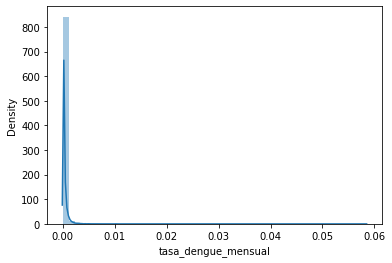

In [74]:
sns.distplot(base_df.tasa_dengue_mensual)

/home/danielk/Documentos/dataton_make_health/my_project_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tasa_dengue_mensual', ylabel='Density'>

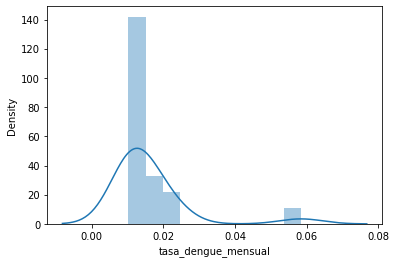

In [75]:
sns.distplot(base_df[base_df.tasa_dengue_mensual>0.01].tasa_dengue_mensual)

In [76]:
base_df

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,tasa_dengue_mensual_x10000_habitantes
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007,2286126,5,4.374212e-07,0.004374
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007,20643,0,0.000000e+00,0.000000
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007,2261,0,0.000000e+00,0.000000
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007,3935,0,0.000000e+00,0.000000
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007,27996,0,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018,1048,0,0.000000e+00,0.000000
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018,20936,5,0.000000e+00,0.000000
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018,10122,3,0.000000e+00,0.000000
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018,4059,0,0.000000e+00,0.000000


<AxesSubplot:xlabel='temperature', ylabel='Count'>

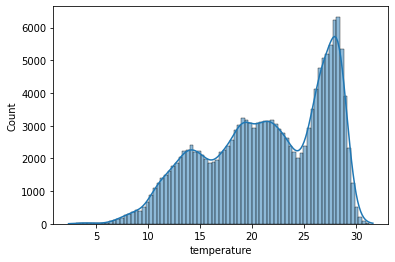

In [77]:
sns.histplot(base_df.temperature, kde=True)

<AxesSubplot:xlabel='precipitation', ylabel='Count'>

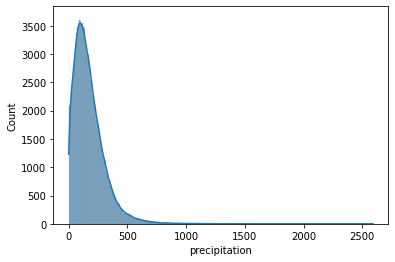

In [78]:
sns.histplot(base_df.precipitation, kde=True)

<AxesSubplot:xlabel='population', ylabel='Count'>

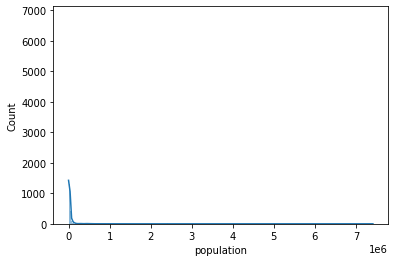

In [79]:
sns.histplot(base_df.population, kde=True)

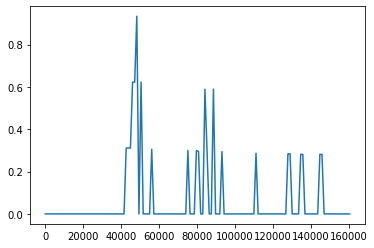

In [80]:
plt.plot( base_df[base_df['Municipality code']==5686].tasa_dengue_mensual_x10000_habitantes)


In [81]:
sorted_base = base_df.sort_values(by=['tasa_dengue_mensual_x10000_habitantes'], ascending=False)

In [82]:
sorted_base.head(10)

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,tasa_dengue_mensual_x10000_habitantes
48132,81300,Fortul,TEMPERATURE_jul_10,24.856554,jul,7,2010,81300|2010|7,764.750732,256,81300|2010,4384,613,0.058394,583.941606
47011,81300,Fortul,TEMPERATURE_jun_10,25.280602,jun,6,2010,81300|2010|6,423.315735,101,81300|2010,4384,613,0.023038,230.383212
109301,25851,Útica,TEMPERATURE_feb_15,26.325454,feb,2,2015,25851|2015|2,81.891495,103,25851|2015,4670,143,0.022056,220.556745
45890,81300,Fortul,TEMPERATURE_may_10,26.513798,may,5,2010,81300|2010|5,352.717163,81,81300|2010,4384,613,0.018476,184.762774
43423,63302,Génova,TEMPERATURE_mar_10,19.235630,mar,3,2010,63302|2010|3,115.419006,178,63302|2010,9833,504,0.018102,181.023086
49253,81300,Fortul,TEMPERATURE_aug_10,25.488840,aug,8,2010,81300|2010|8,381.301178,76,81300|2010,4384,613,0.017336,173.357664
97497,91407,La Pedrera,TEMPERATURE_mar_14,26.422619,mar,3,2014,91407|2014|3,343.502777,30,91407|2014,2209,44,0.013581,135.808058
41782,15810,Tipacoque,TEMPERATURE_feb_10,20.069880,feb,2,2010,15810|2010|2,46.540886,46,15810|2010,3768,72,0.012208,122.080679
122754,25862,Vergara,TEMPERATURE_feb_16,23.601080,feb,2,2016,25862|2016|2,37.494522,83,25862|2016,6859,288,0.012101,121.008893
115791,17442,Marmato,TEMPERATURE_aug_15,21.975253,aug,8,2015,17442|2015|8,121.702942,102,17442|2015,8439,253,0.012087,120.867401


In [83]:
df_promedio = sorted_base.groupby(['Municipality code', 'Municipality'], as_index=False).mean()

In [84]:
df_promedio.sort_values(by=['tasa_dengue_mensual_x10000_habitantes'], ascending=False)

,Municipality code,Municipality,temperature,month,year,precipitation,cases,population,year_cases,tasa_dengue_mensual,tasa_dengue_mensual_x10000_habitantes
1049,81300,Fortul,26.001667,6.5,2012.5,205.753385,9.625000,9244.916667,115.500000,0.001786,17.864949
518,25488,Nilo,26.965273,6.5,2012.5,168.763535,16.173611,11272.916667,194.083333,0.001475,14.751094
372,19290,Florencia,21.548408,6.5,2012.5,140.476319,8.666667,5587.166667,104.000000,0.001433,14.332291
983,73449,Melgar,25.281559,6.5,2012.5,163.673694,28.534722,33887.416667,342.416667,0.000845,8.451084
1054,85010,Aguazul,26.847678,6.5,2012.5,242.917700,27.034722,33517.333333,324.416667,0.000820,8.202928
...,...,...,...,...,...,...,...,...,...,...,...
240,15368,Jericó,15.192210,6.5,2012.5,111.356769,0.000000,4640.583333,0.000000,0.000000,0.000000
298,15776,Sutamarchán,14.191082,6.5,2012.5,99.996365,0.000000,6070.916667,0.000000,0.000000,0.000000
238,15362,Iza,14.133071,6.5,2012.5,84.543979,0.000000,1902.666667,0.000000,0.000000,0.000000
237,15332,Güicán de La Sierra,3.945462,6.5,2012.5,73.244966,0.000000,4594.583333,0.000000,0.000000,0.000000


# top 5 municipios picos más altos de casos por  10000 habitantes

In [85]:
# 81300 	Fortul

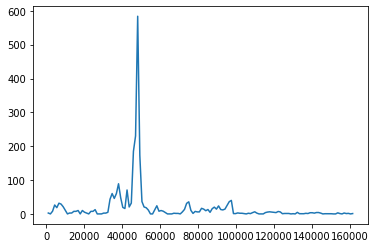

In [86]:
plt.plot( base_df[base_df['Municipality code']==81300].tasa_dengue_mensual_x10000_habitantes)

In [87]:
# 25488 	Nilo

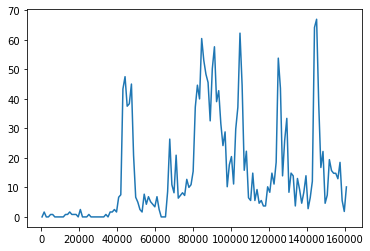

In [88]:
plt.plot( base_df[base_df['Municipality code']==25488].tasa_dengue_mensual_x10000_habitantes)

In [89]:
#19290 	Florencia

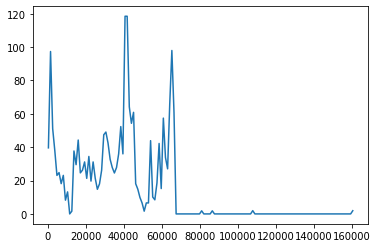

In [90]:
plt.plot( base_df[base_df['Municipality code']==19290].tasa_dengue_mensual_x10000_habitantes)

In [91]:
# 73449 	Melgar

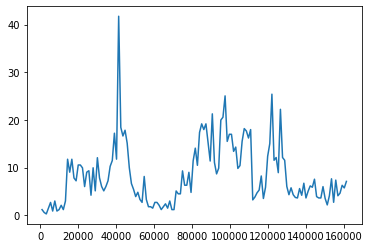

In [92]:
plt.plot( base_df[base_df['Municipality code']==73449].tasa_dengue_mensual_x10000_habitantes)

In [93]:
#85010 	Aguazul

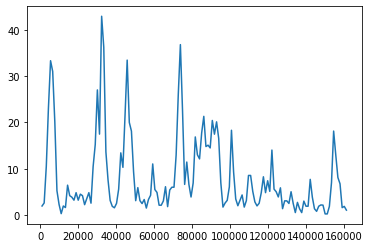

In [94]:
plt.plot( base_df[base_df['Municipality code']==85010].tasa_dengue_mensual_x10000_habitantes)